
## Models for  Auto MPG Data set


### Model 2

- missing values for `horsepower` replaced with mean of `horsepower`.
- `cylinders`, `model year` and `origin` as category.
- categorical data encoded with Label encoder.


## Import libraries/packages

In [3]:
### General libraries ###
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##################################

### ML Models ###
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree.export import export_text
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

##################################

### Metrics ###
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

## Part 1: Load and clean the data

In [4]:
# Read the data from the auto-mpg_data-original.csv file.
ds = pd.read_csv("auto-mpg_data-original.csv")

In [5]:
# Examine the data types and the number of non-null items.
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model year      406 non-null float64
origin          406 non-null float64
car name        406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [6]:
# Display the shape of the data.
print("The data frame has {} rows and {} columns.".format(
    ds.shape[0], ds.shape[1]))

The data frame has 406 rows and 9 columns.


In [7]:
# Statistics for the data set.
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.50,23.0,29.000,46.6
cylinders,406.0,5.475369,1.712160,3.0,4.00,4.0,8.000,8.0
displacement,406.0,194.779557,104.922458,68.0,105.00,151.0,302.000,455.0
horsepower,400.0,105.082500,38.768779,46.0,75.75,95.0,130.000,230.0
weight,406.0,2979.413793,847.004328,1613.0,2226.50,2822.5,3618.250,5140.0
acceleration,406.0,15.519704,2.803359,8.0,13.70,15.5,17.175,24.8
model year,406.0,75.921182,3.748737,70.0,73.00,76.0,79.000,82.0
origin,406.0,1.568966,0.797479,1.0,1.00,1.0,2.000,3.0


In [8]:
# Check for duplicate rows.
print(f"There are {ds.duplicated().sum()} duplicate rows in the data set.")

There are 0 duplicate rows in the data set.


In [9]:
# Number of null values for each attribute.
ds.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

The rows with a null value from the `mpg` attribute can be seen below:

In [10]:
# Rows with null value at the "mpg" column.
ds[ds['mpg'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
367,NaN,4.0,121.0,110.0,2800.0,15.4,81.0,2.0,saab 900s


The above rows provide no usefull information because the class attribute value is missing. Hence, we cannot use them as a training nor a test set for our model, so they will be removed them from the dataset. For now, we store them for a potential future use.

In [11]:
# Store rows with a missing value at "mpg" attribute as a prediction set for future use.
prediction_set = ds[ds['mpg'].isnull()].drop('mpg', axis=1)

The rows with null values in the `horsepower` column can be seen below:

In [12]:
# Rows with null value at the "horsepower" column.
ds[ds['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


In [13]:
# Fill the null values of "horsepower" with the mean of "horsepower".
ds['horsepower'] = ds['horsepower'].fillna(ds['horsepower'].mean())

In [14]:
# Remove rows from the data set with a null values.
new_ds = ds.dropna()

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in ['cylinders', 'model year', 'origin']:
    new_ds[col] = le.fit_transform(new_ds[col])

In [16]:
# Information about the new "clean" data set.
new_ds.info()

# Display the shape of the data.
print("\nThe new data frame has {} rows and {} columns.".format(
    new_ds.shape[0], new_ds.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 31.1+ KB

The new data frame has 398 rows and 9 columns.


In [17]:
# Statistics for the new data set.
new_ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,2.195980,1.328541,0.0,1.000,1.0,4.000,4.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.478631,38.199261,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,6.010050,3.697627,0.0,3.000,6.0,9.000,12.0
origin,398.0,0.572864,0.802055,0.0,0.000,0.0,1.000,2.0


<Figure size 1440x1440 with 0 Axes>

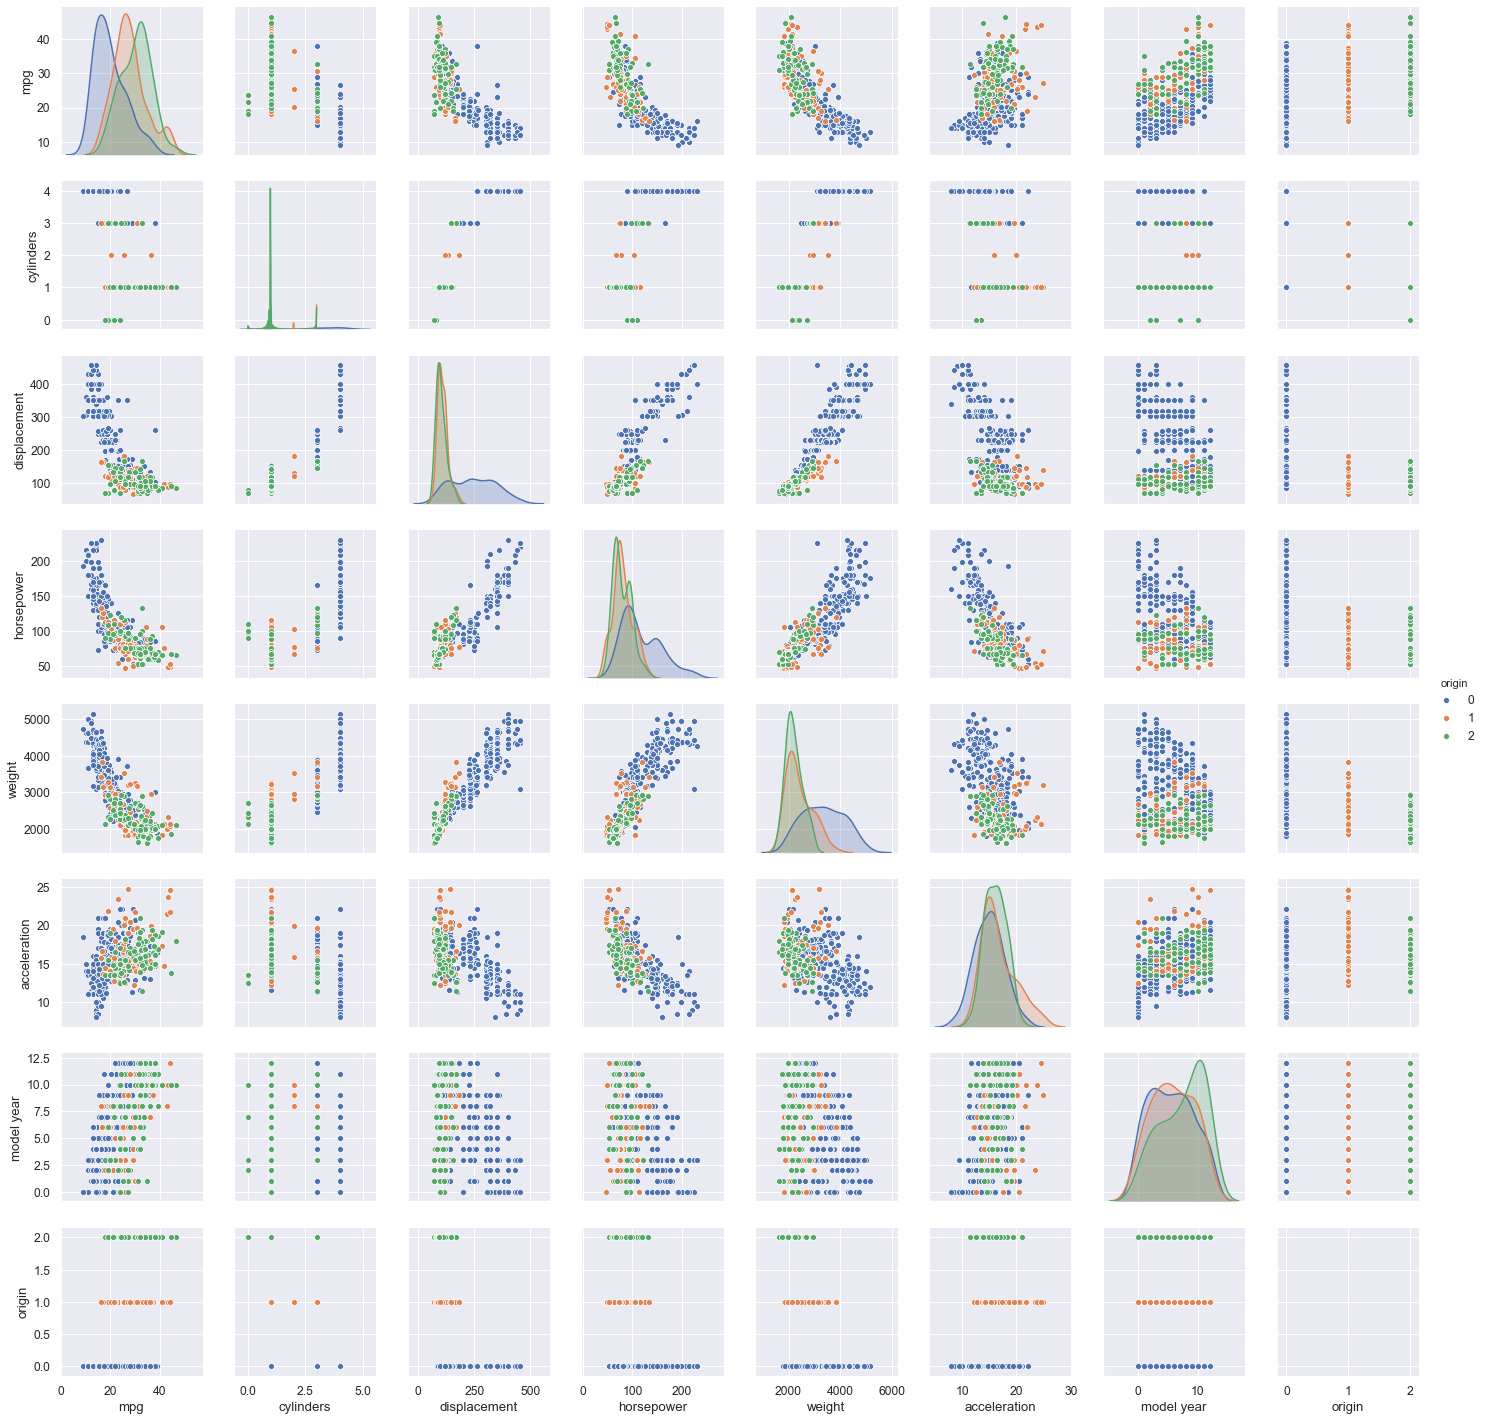

In [18]:
# Plotting a pairplot for the new data set.
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.1)
sns.pairplot(data=new_ds, diag_kind='kde', hue='origin')
plt.show()

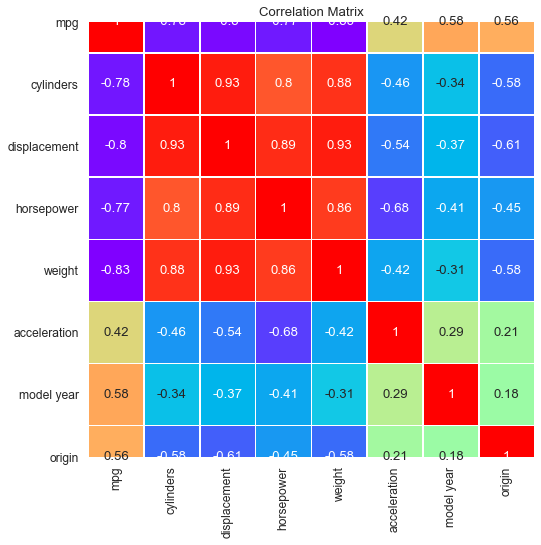

In [19]:
# Plotting a correlation heatmap for the new data set.
corr = new_ds.corr()
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.1)
sns.heatmap(data=corr, annot=True, cbar=False, cmap='rainbow', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

## Part 2: Preproccesing
In this part we prepare the data for our models. This means that we choose the columns that will be our independed variables and which column the target that we want to predict. Once we are done with that, we split our data into train and test sets and perfom a standardization upon them.

In [20]:
# Distinguish attribute columns and target column.
X = new_ds[new_ds.columns[1:-1]]
y = new_ds['mpg']

In [21]:
# Split to train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25)

In [22]:
# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Part 3: Modeling
In this section we build and try 3 models:
- Linear Regression
- Decision tree
- Neural network

Each model will be trained and make a prediction for the test set. Accuracy, precision, recall, f1-score, confusion matrix and ROC will be calculated for each model. Then we will use the GridSearchCV module to tune our models and search for the best hyperparameters in order to increase the accuracy of each model.

## Linear Regression

In [23]:
# Initialize a Logistic Regression estimator.
linreg = LinearRegression(n_jobs=-1)

# Train the estimator.
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [28]:
# Make predictions.
lin_pred = linreg.predict(X_test)

# Calculate CV score.
cv_lin_reg = cross_val_score(linreg, X, y, cv=10).mean()

## Linear Regression Metrics

In [29]:
# Mean squared error (relative error).
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, lin_pred))

# Mean absolute error (average error).
print("Mean absolute error (MAE): %.2f" %
      mean_absolute_error(y_test, lin_pred))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.1f' % (cv_lin_reg*100), '%')

# Accuracy score: 1 is perfect prediction.
print('Accuracy: %.1f' % (linreg.score(X_test, y_test)*100), '%')

Mean squared error (MSE): 10.75
Mean absolute error (MAE): 2.50
Cross-validation accuracy: 57.1 %
Accuracy: 82.0 %


## Decision tree

In [36]:
# Initialize a decision tree estimator.
tr = tree.DecisionTreeRegressor(max_depth=3, random_state=25)

# Train the estimator.
tr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=25, splitter='best')

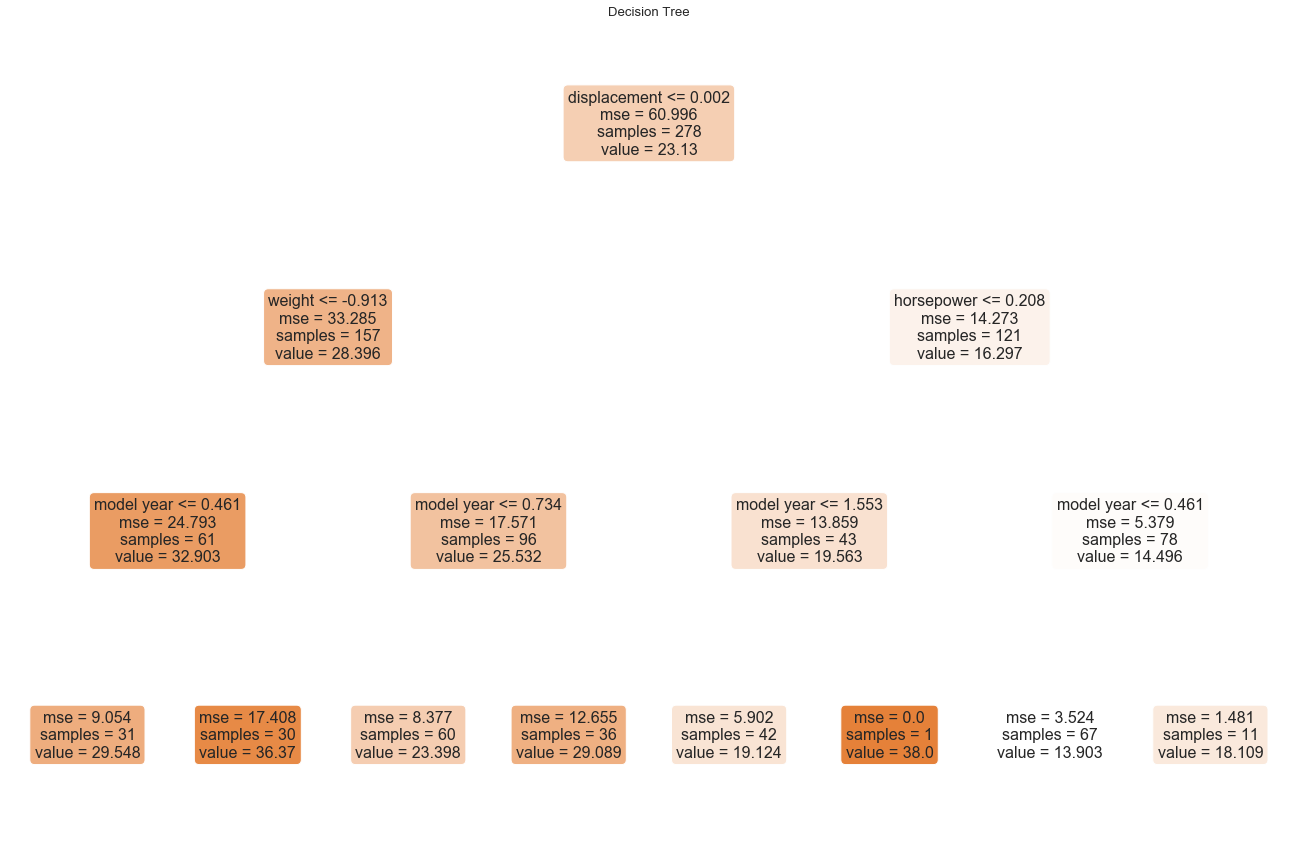

In [37]:
# Plot the tree.
fig = plt.figure(figsize=(23, 15))
tree.plot_tree(tr.fit(X_train, y_train), feature_names=X.columns,
               filled=True, rounded=True, fontsize=16)
plt.title('Decision Tree')

In [38]:
# Print the tree in a simplified version.
r = export_text(tr, feature_names=X.columns.tolist())
print(r)

|--- displacement <= 0.00
|   |--- weight <= -0.91
|   |   |--- model year <= 0.46
|   |   |   |--- value: [29.55]
|   |   |--- model year >  0.46
|   |   |   |--- value: [36.37]
|   |--- weight >  -0.91
|   |   |--- model year <= 0.73
|   |   |   |--- value: [23.40]
|   |   |--- model year >  0.73
|   |   |   |--- value: [29.09]
|--- displacement >  0.00
|   |--- horsepower <= 0.21
|   |   |--- model year <= 1.55
|   |   |   |--- value: [19.12]
|   |   |--- model year >  1.55
|   |   |   |--- value: [38.00]
|   |--- horsepower >  0.21
|   |   |--- model year <= 0.46
|   |   |   |--- value: [13.90]
|   |   |--- model year >  0.46
|   |   |   |--- value: [18.11]



In [49]:
# Make predictions.
tr_pred = tr.predict(X_test)

# Calculate CV score.
cv_tr_reg = cross_val_score(tr, X, y, cv=10).mean()

## Decision tree Metrics

In [40]:
# Mean squared error (relative error).
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, tr_pred))

# Mean absolute error (average error).
print("Mean absolute error (MAE): %.2f" % mean_absolute_error(y_test, tr_pred))

# Cross-Validation accuracy.
print('Cross-validation accuracy: %0.1f' % (cv_tr_reg*100), '%')

# Accuracy score: 1 is perfect prediction.
print('Accuracy: %.1f' % (tr.score(X_test, y_test)*100), '%')

Mean squared error (MSE): 13.97
Mean absolute error (MAE): 2.66
Cross-validation accuracy: 81.1 %
Accuracy: 76.6 %


## Neural network (MLP)

In [45]:
# Initialize a Multi-layer Perceptron classifier.
mlp = MLPRegressor(max_iter=1000, random_state=25, shuffle=True, verbose=False)

# Train the classifier.
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=25, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [50]:
# Make predictions.
mlp_pred = mlp.predict(X_test)

# Calculate CV score.
cv_mlp_reg = cross_val_score(mlp, X, y, cv=10).mean()

## Neural network (MLP) metrics

In [51]:
# Mean squared error (relative error).
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, mlp_pred))

# Mean absolute error (average error).
print("Mean absolute error (MAE): %.2f" %
      mean_absolute_error(y_test, mlp_pred))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.1f' % (cv_mlp_reg*100), '%')

# Accuracy score: 1 is perfect prediction.
print('Accuracy: %.1f' % (mlp.score(X_test, y_test)*100), '%')

Mean squared error (MSE): 7.49
Mean absolute error (MAE): 1.85
Cross-validation accuracy: 39.1 %
Accuracy: 87.4 %


## Results

In [52]:
metrics = ['MSE', 'MAE', 'CV accuracy', 'Accuracy']

# Plot metrics.
fig = go.Figure(data=[
    go.Bar(name='Linear Regression', x=metrics, y=[mean_squared_error(
        y_test, lin_pred), mean_absolute_error(y_test, lin_pred), cv_lin_reg, linreg.score(X_test, y_test)]),
    go.Bar(name='Decision tree', x=metrics, y=[mean_squared_error(
        y_test, tr_pred), mean_absolute_error(y_test, tr_pred), cv_tr_reg, tr.score(X_test, y_test)]),
    go.Bar(name='Neural Network', x=metrics, y=[mean_squared_error(
        y_test, mlp_pred), mean_absolute_error(y_test, mlp_pred), cv_mlp_reg, mlp.score(X_test, y_test)])

])

fig.update_layout(title_text='Results',
                  barmode='group', xaxis_tickangle=-45, bargroupgap=0.05)
fig.show()

In [53]:
d = {
    '': ['Linear Regression', 'Decision Tree', 'Neural Network (MLP)'],
    'MSE': [mean_squared_error(y_test, lin_pred), mean_squared_error(y_test, tr_pred), mean_squared_error(y_test, mlp_pred)],
    'MAE': [mean_absolute_error(y_test, lin_pred), mean_absolute_error(y_test, tr_pred), mean_absolute_error(y_test, mlp_pred)],
    'CV Accuracy': [cv_lin_reg, cv_tr_reg, cv_mlp_reg],
    'Accuracy': [linreg.score(X_test, y_test), tr.score(X_test, y_test), mlp.score(X_test, y_test)]
}

results = pd.DataFrame(data=d).round(3).set_index('')
results

,MSE,MAE,CV Accuracy,Accuracy
,,,,
Linear Regression,10.754,2.500,0.571,0.820
Decision Tree,13.965,2.660,0.549,0.766
Neural Network (MLP),7.490,1.849,0.391,0.874


## Quinlan's results

|                   | Mean squared error (MSE) | Mean absolute error (MAE) |
|-------------------|:------------------------:|:-------------------------:|
| Linear Regression |           19.4           |            2.61           |
| Decision tree     |           14.7           |            2.11           |
| Neural Network    |           12.5           |            2.02           |